# Big Data Project 

In [1]:
#creating pyspark session 
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("big-data-project") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


# Loading Data

In [2]:
#Loading data into the spark from gcp bucket 
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
schema = StructType([
    StructField("age", IntegerType(), True),
    StructField("workclass", StringType(), True),
    StructField("final_weight", IntegerType(), True),
    StructField("education", StringType(), True),
    StructField("educational_num", IntegerType(), True),
    StructField("marital_status", StringType(), True),
    StructField("occupation", StringType(), True),
    StructField("relationship", StringType(), True),
    StructField("race", StringType(), True),
    StructField("sex", StringType(), True),
    StructField("capital_gain", IntegerType(), True),
    StructField("capital_loss", IntegerType(), True),
    StructField("hours_per_week", IntegerType(), True),
    StructField("native_country", StringType(), True),
    StructField("income", StringType(), True)
])
#traindata = spark.read.csv('data_frame.csv',inferSchema=True, header=True, schema=schema)
traindata = spark.read.load("gs://ajmal1/data_frame.csv",format="csv", sep=",", inferSchema=True,schema=schema, header=True)

'''this is another way to read data from bucket.initialy data in string then convert to dataframe. uncomment the code for executing'''
# from google.cloud import storage
# import pandas as pd
# from io import BytesIO
# import pandas as pd

# client = storage.Client()
# bucket = client.get_bucket('ajmal1')
# blob = storage.Blob('data_frame.csv', bucket)
# log_txt = blob.download_as_string()
# s=str(log_txt,'utf-8')
# data = StringIO(s) 
# df=pd.read_csv(data)

# #converting the dataframe to spark dataframe

# from pyspark.sql import SQLContext
# sqlCtx = SQLContext(spark)
# traindata=sqlCtx.createDataFrame(df)





'this is another way to read data from bucket.initialy data in string then convert to dataframe. uncomment the code for executing'

# Data Analysis 

In [3]:
#rows and col in dataset
length=traindata.count(),len(traindata.columns)
print("length of data is :",length)

length of data is : (48842, 15)


In [4]:
#checking the schema of the data
print("Schema of the data")
traindata.printSchema()

Schema of the data
root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- final_weight: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- educational_num: integer (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital_gain: integer (nullable = true)
 |-- capital_loss: integer (nullable = true)
 |-- hours_per_week: integer (nullable = true)
 |-- native_country: string (nullable = true)
 |-- income: string (nullable = true)



In [5]:
#showing the first 5 rows of Data
print("First five rows of data")
traindata.show(5)

First five rows of data
+---+---------+------------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|age|workclass|final_weight|   education|educational_num|    marital_status|       occupation|relationship| race|   sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+---+---------+------------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
| 25|  Private|      226802|        11th|              7|     Never-married|Machine-op-inspct|   Own-child|Black|  Male|           0|           0|            40| United-States| <=50K|
| 38|  Private|       89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|     Husband|White|  Male|           0|           0|            50| United-States| <=50K|
| 28|Local-gov|      336951|  Assoc-acdm|             12

# Missing value 

In [6]:
from pyspark.sql.functions import when, count, col
coll=['income',"age","workclass", "final_weight", 'education','educational_num'
     ,'marital_status','occupation','relationship','race','sex',
     'capital_gain','capital_loss','hours_per_week','native_country']


for co in coll:
    val=traindata.where(col(co).isNull()).count()
    if val>0:
         print("missing value in:",co,val)
        
    unknown=traindata.filter(traindata[co]=='?').count()
    if unknown>0:
        print("? value in ",co,unknown)
if val<=0:
    print("we dont have missing val in any attribute")


? value in  workclass 2799
? value in  occupation 2809
? value in  native_country 857
we dont have missing val in any attribute


In [7]:
#dropout the unknown value
new_df = traindata.filter((traindata.workclass != '?') & (traindata.occupation != '?') & (traindata.native_country != '?'))
new_df.show(5)

+---+---------+------------+------------+---------------+------------------+-----------------+-------------+-----+----+------------+------------+--------------+--------------+------+
|age|workclass|final_weight|   education|educational_num|    marital_status|       occupation| relationship| race| sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+---+---------+------------+------------+---------------+------------------+-----------------+-------------+-----+----+------------+------------+--------------+--------------+------+
| 25|  Private|      226802|        11th|              7|     Never-married|Machine-op-inspct|    Own-child|Black|Male|           0|           0|            40| United-States| <=50K|
| 38|  Private|       89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|      Husband|White|Male|           0|           0|            50| United-States| <=50K|
| 28|Local-gov|      336951|  Assoc-acdm|             12|Married-civ-spouse|  Protect

# Statestics of Data

In [8]:
#statestics of data
new_df.describe(['age','capital_gain','hours_per_week','capital_loss','final_weight']).show()

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|               age|      capital_gain|    hours_per_week|      capital_loss|      final_weight|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|             45222|             45222|             45222|             45222|             45222|
|   mean|38.547941267524656|1101.4303436380524| 40.93801689443191|   88.595418159303| 189734.7343107337|
| stddev|13.217870219055532|  7506.43008374525|12.007508230033423|404.95609205896506|105639.19513422064|
|    min|                17|                 0|                 1|                 0|             13492|
|    max|                90|             99999|                99|              4356|           1490400|
+-------+------------------+------------------+------------------+------------------+------------------+



In [9]:
import matplotlib.pyplot as plt
workclass_df=new_df.filter(new_df['income']=='>50K').groupBy("workclass").count().orderBy('count',ascending=False)
print("people that have >50k $ income grouped by workclass")
workclass_df.show()
workclass_df=workclass_df.toPandas()
workclass_df.plot(x="workclass",y='count',kind="bar")
plt.ylabel('Count')
plt.title("workclass that has >50K income")
plt.show()

people that have >50k $ income grouped by workclass
+----------------+-----+
|       workclass|count|
+----------------+-----+
|         Private| 7251|
|Self-emp-not-inc| 1059|
|       Local-gov|  915|
|    Self-emp-inc|  912|
|     Federal-gov|  549|
|       State-gov|  520|
|     Without-pay|    2|
+----------------+-----+



<Figure size 640x480 with 1 Axes>

>50k $ income grouped by occupation
+-----------------+-----+
|       occupation|count|
+-----------------+-----+
|  Exec-managerial| 2867|
|   Prof-specialty| 2704|
|            Sales| 1455|
|     Craft-repair| 1355|
|     Adm-clerical|  756|
| Transport-moving|  478|
|     Tech-support|  411|
|Machine-op-inspct|  365|
|  Protective-serv|  307|
|    Other-service|  196|
|  Farming-fishing|  172|
|Handlers-cleaners|  135|
|     Armed-Forces|    4|
|  Priv-house-serv|    3|
+-----------------+-----+



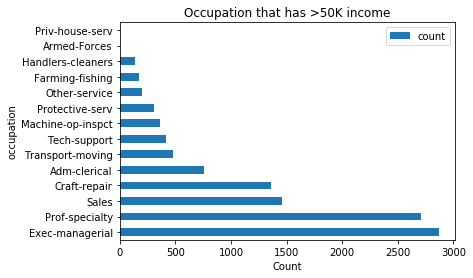

In [10]:
plot_df=new_df.filter(new_df['income']=='>50K').groupBy("occupation").count().orderBy('count',ascending=False)

print(">50k $ income grouped by occupation")
plot_df.show()
plot_df=plot_df.toPandas()
plot_df.plot(x="occupation",y='count',kind="barh")
plt.xlabel('Count')
plt.title("Occupation that has >50K income")
plt.show()

>50k $ income
+------+-----+
|   sex|count|
+------+-----+
|  Male| 9539|
|Female| 1669|
+------+-----+



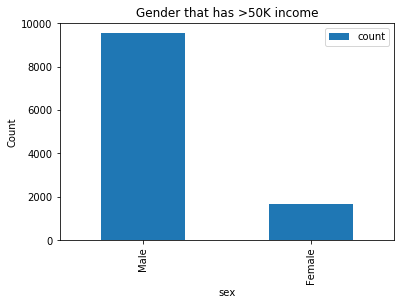

In [11]:
plot_df=new_df.filter(new_df['income']=='>50K').groupBy("sex").count().orderBy('count',ascending=False)
print(">50k $ income")
plot_df.show()

plot_df=plot_df.toPandas()
plot_df.plot(x="sex",y='count',kind="bar")
plt.ylabel('Count')
plt.title("Gender that has >50K income")
plt.show()

people that have >50k $ income age>30 grouped by education
+------------+-----+
|   education|count|
+------------+-----+
|   Bachelors| 2817|
|     HS-grad| 2217|
|Some-college| 1815|
|     Masters| 1326|
| Prof-school|  570|
|   Assoc-voc|  442|
|   Doctorate|  389|
|  Assoc-acdm|  360|
|        10th|   79|
|        11th|   74|
|     7th-8th|   51|
|        12th|   38|
|         9th|   36|
|     5th-6th|   21|
|     1st-4th|    8|
|   Preschool|    1|
+------------+-----+



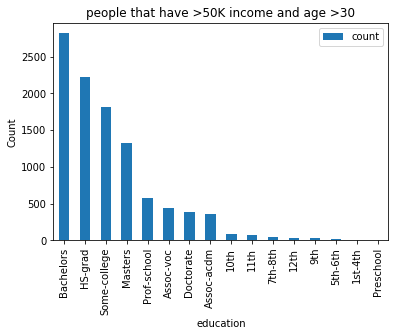

In [12]:
plot_df=new_df.filter((new_df['income']=='>50K') & (new_df["age"]>30)).groupBy("education").count().orderBy('count',ascending=False)
print("people that have >50k $ income age>30 grouped by education")
plot_df.show()
plot_df=plot_df.toPandas()
plot_df.plot(x="education",y='count',kind="bar")
plt.ylabel('Count')
plt.title("people that have >50K income and age >30")
plt.show()

<50K $ income and capital gain >100K and age >30 grouuped by occupation
+-----------------+-----+
|       occupation|count|
+-----------------+-----+
|     Craft-repair|  204|
|     Adm-clerical|  185|
|   Prof-specialty|  164|
|  Exec-managerial|  143|
|            Sales|  142|
|    Other-service|  118|
|Machine-op-inspct|  112|
| Transport-moving|   73|
|Handlers-cleaners|   58|
|  Farming-fishing|   57|
|     Tech-support|   55|
|  Protective-serv|   30|
|  Priv-house-serv|    8|
+-----------------+-----+



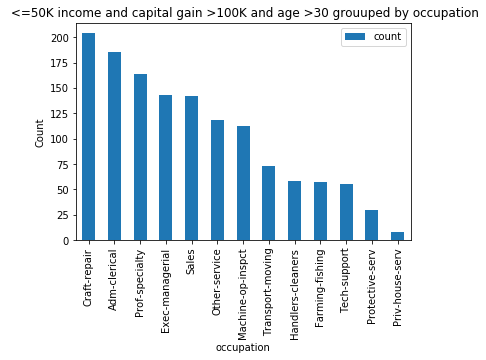

In [13]:
plot_df=new_df.filter((new_df['income']=='<=50K') & (new_df["capital_gain"]>1000) ).groupBy("occupation").count().orderBy('count',ascending=False)
print("<50K $ income and capital gain >100K and age >30 grouuped by occupation")
plot_df.show()

plot_df=plot_df.toPandas()
plot_df.plot(x="occupation",y='count',kind="bar")
plt.ylabel('Count')
plt.title(" <=50K income and capital gain >100K and age >30 grouuped by occupation")
plt.show()

In [14]:
#people that have $>50k incom and <=50k
lower=new_df.filter(traindata['income']=='<=50K').count()
higher=new_df.filter(traindata['income']=='>50K').count()
print("people that have the income >50k per year:",lower)
print("people that have the income <=50k per year:",higher)

people that have the income >50k per year: 34014
people that have the income <=50k per year: 11208


# String Indexer
for converting the catagorical data to numarical col

In [15]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoderEstimator
categoricalColumns = ["workclass", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]
stages = [] # stages in our Pipeline
for categoricalCol in categoricalColumns:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    stages += [stringIndexer]
#stages
#stringIndexer.show(5)

In [16]:
#convert the label into numeric
label_stringIdx = StringIndexer(inputCol="income", outputCol="label")
#new_df = label_stringIdx.fit(new_df).transform(new_df)

stages += [label_stringIdx]
#new_df.show(1)

# Vector Assembler 

In [17]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
# Transform all features into a vector using VectorAssembler
numericCols = ["age", "final_weight", "educational_num", "capital_gain", "capital_loss", "hours_per_week"]
assemblerInputs = [c + "Index" for c in categoricalColumns] + numericCols
#assemblerInputs.show(5)
#numeric_dataset=new_df.select(assemblerInputs)
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
#assembler
#new_df.show(5)
stages += [assembler]
#stages
#numeric_dataset.show(5)

# PipeLine

In [18]:
#Pipeline adding all the attribute 
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
# numPipeline = Pipeline(stages=[assembler, scaler])
# catPipeline = Pipeline(stages=[stringIndexer])
# pipeline = Pipeline(stages=[numPipeline, catPipeline])

# newHousing = pipeline.fit(new_df).transform(new_df)
# newHousing.show(1)
  
partialPipeline = Pipeline().setStages(stages)
pipelineModel = partialPipeline.fit(new_df)
pipelined_df = pipelineModel.transform(new_df)

In [19]:
col=['income',"age","workclass", "final_weight", 'education','educational_num'
     ,'marital_status','occupation','relationship','race','sex',
     'capital_gain','capital_loss','hours_per_week','native_country']

selectedcols = [ "features","label"]+numericCols
selectedcols+=categoricalColumns
selectedcols+=["income"]

testing = pipelined_df.select(selectedcols)
#testing.show(5)
#display(traindata)
print("showing dataset with feature col after assembler")
testing.show(5)

showing dataset with feature col after assembler
+--------------------+-----+---+------------+---------------+------------+------------+--------------+---------+------------------+-----------------+-------------+-----+----+--------------+------+
|            features|label|age|final_weight|educational_num|capital_gain|capital_loss|hours_per_week|workclass|    marital_status|       occupation| relationship| race| sex|native_country|income|
+--------------------+-----+---+------------+---------------+------------+------------+--------------+---------+------------------+-----------------+-------------+-----+----+--------------+------+
|[0.0,1.0,6.0,2.0,...|  0.0| 25|      226802|              7|           0|           0|            40|  Private|     Never-married|Machine-op-inspct|    Own-child|Black|Male| United-States| <=50K|
|(13,[2,7,8,9,12],...|  0.0| 38|       89814|              9|           0|           0|            50|  Private|Married-civ-spouse|  Farming-fishing|      Husband|

# Stand Scaler

In [20]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withMean=True)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(testing)

# Normalize each feature to have unit standard deviation.
testing = scalerModel.transform(testing)

In [21]:
#showing dataset with scaled feature after scalling
print("showing dataset with scaled feature after scalling")
testing['features','scaledFeatures'].show(5)

showing dataset with scaled feature after scalling
+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[0.0,1.0,6.0,2.0,...|[-0.5024394581349...|
|(13,[2,7,8,9,12],...|[-0.5024394581349...|
|(13,[0,2,7,8,9,12...|[1.03413436858976...|
|(13,[2,4,7,8,9,10...|[-0.5024394581349...|
|(13,[1,2,3,7,8,9,...|[-0.5024394581349...|
+--------------------+--------------------+
only showing top 5 rows



# Correlation 

In [22]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

r1 = Correlation.corr(dataset=testing, column="features", method="pearson").collect()[0]
stages += [r1]

print("correlation matrix:\n" + str(r1[0]))

correlation matrix:
DenseMatrix([[ 1.        , -0.04908207, -0.05348787, -0.07453793,  0.0178218 ,
              -0.0427003 , -0.02256214,  0.16475269, -0.03442118,  0.17000819,
               0.05251816,  0.0328407 ,  0.07796761],
             [-0.04908207,  1.        ,  0.05193543,  0.42184271,  0.06905708,
               0.41071485,  0.01900626,  0.02890029,  0.00697762, -0.09638221,
              -0.05102472, -0.05068099, -0.145054  ],
             [-0.05348787,  0.05193543,  1.        ,  0.06434085,  0.03621826,
              -0.00176278,  0.00266329, -0.06621018,  0.00923248, -0.2610863 ,
              -0.06042741, -0.03905524, -0.0526023 ],
             [-0.07453793,  0.42184271,  0.06434085,  1.        ,  0.11379072,
               0.55605286,  0.0422144 , -0.2220075 ,  0.01792894, -0.10450729,
              -0.0573488 , -0.05591451, -0.23732104],
             [ 0.0178218 ,  0.06905708,  0.03621826,  0.11379072,  1.        ,
               0.06581965,  0.20890255, -0.03539247, 

# Split the dataset

In [23]:
#split the data
### Randomly split data into training and test sets. set seed for reproducibility
(trainingData, testData) = testing.randomSplit([0.7, 0.3], seed=100)
print("Training Data",trainingData.count())
print("Testing Data",testData.count())

Training Data 31718
Testing Data 13504


In [24]:
#people that have $>50k incom and <=50k
higher=trainingData.filter(trainingData['income']=='>50K').count()
lower=trainingData.filter(trainingData['income']=='<=50K').count()
#trainingData.groupBy("income").count().show()
print("people that have the income >50k per year:",higher)
print("people that have the income <=50k per year:",lower)
print("Data is imbalance so we need to balance the data")

people that have the income >50k per year: 7881
people that have the income <=50k per year: 23837
Data is imbalance so we need to balance the data


# Under sampling

In [25]:
higher=trainingData.filter(trainingData['income']=='>50K')
lower=trainingData.filter(trainingData['income']=='<=50K')

ratio=float (higher.count())/ float(trainingData.count())
#print("ration:",ratio)
rate=lower.sample(False,ratio)
#print(rate)
balanced_df=higher.unionAll(rate)




In [26]:
print("After downsampling")
higher=balanced_df.filter(balanced_df['income']=='>50K').count()
lower=balanced_df.filter(balanced_df['income']=='<=50K').count()
print("people that have the income >50k per year:",higher)
print("people that have the income <=50k per year:",lower)
#print(testData.count())

After downsampling
people that have the income >50k per year: 7881
people that have the income <=50k per year: 5787


# Machine Learning

# Logistic Regression

In [27]:
from pyspark.ml.classification import LogisticRegression
# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="scaledFeatures", maxIter=10)
# Train model with Training Data
lrModel = lr.fit(balanced_df)

In [28]:
#predict the test data 
predictions = lrModel.transform(testData)


In [29]:
# View model's predictions and probabilities of each prediction class
# You can select any columns in the above schema to view as well. For example's sake we will choose age & occupation
selected = predictions.select("label", "prediction","age","native_country",'income')
print("prediction with col label , prediction, age, native country and income")
selected.show(5)

prediction with col label , prediction, age, native country and income
+-----+----------+---+--------------+------+
|label|prediction|age|native_country|income|
+-----+----------+---+--------------+------+
|  0.0|       0.0| 24| United-States| <=50K|
|  0.0|       0.0| 26| United-States| <=50K|
|  0.0|       0.0| 27| United-States| <=50K|
|  0.0|       0.0| 27| United-States| <=50K|
|  0.0|       0.0| 30| United-States| <=50K|
+-----+----------+---+--------------+------+
only showing top 5 rows



In [30]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate the model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
accuracy=evaluator.evaluate(predictions)
print("Logistic regression  ROC",accuracy)
evaluator.getMetricName()


Logistic regression  ROC 0.8807657808163


'areaUnderROC'

In [31]:
#creating a list to stire the accuracy and model name of each algorithem 
models=[]
modell=[lrModel,accuracy]
#models.values(lrModel,accuracy)
models.append(modell)
#models

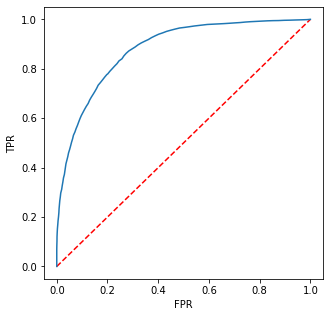

In [32]:
import matplotlib.pyplot as plt


plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(lrModel.summary.roc.select('FPR').collect(),
         lrModel.summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [33]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
lr_hyper_model = cv.fit(balanced_df)
# this will likely take a fair 
predictions_cvmodel = lr_hyper_model.transform(testData)
accuracy=evaluator.evaluate(predictions_cvmodel)
print("After parameter tunning Lr ROC ",accuracy)
models.append([lr_hyper_model,accuracy])

After parameter tunning Lr ROC  0.8760863730898989


# Decsion Tree

In [34]:
from pyspark.ml.classification import DecisionTreeClassifier

# Create initial Decision Tree Model
dt = DecisionTreeClassifier(labelCol="label", featuresCol="scaledFeatures", maxDepth=3)

# Train model with Training Data
dtModel = dt.fit(balanced_df)

In [35]:
print("numNodes in Decsionn Tree = ", dtModel.numNodes)
print("depth in Decsion Tree= ", dtModel.depth)
#display(dtModel)

# Make predictions on test data using the Transformer.transform() method.
predictions_dt = dtModel.transform(testData)

numNodes in Decsionn Tree =  9
depth in Decsion Tree=  3


In [36]:
# View model's predictions and probabilities of each prediction class
print("Output of DT algorithm")
selected = predictions_dt.select("label", "prediction", "probability", "age")
selected.show(5)

Output of DT algorithm
+-----+----------+--------------------+---+
|label|prediction|         probability|age|
+-----+----------+--------------------+---+
|  0.0|       0.0|[0.81808326105810...| 24|
|  0.0|       0.0|[0.81808326105810...| 26|
|  0.0|       0.0|[0.81808326105810...| 27|
|  0.0|       0.0|[0.81808326105810...| 27|
|  0.0|       0.0|[0.81808326105810...| 30|
+-----+----------+--------------------+---+
only showing top 5 rows



In [37]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
# Evaluate model
evaluator = BinaryClassificationEvaluator()
accuracy=evaluator.evaluate(predictions_dt)
print("Decsion tree ROC",accuracy)
evaluator.getMetricName()
models.append([dtModel,accuracy])

Decsion tree ROC 0.7950739893072066


In [38]:

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [1, 2, 6, 10])
             .addGrid(dt.maxBins, [20, 40, 80])
             .build())
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=dt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
dt_hyper_model = cv.fit(balanced_df)
# Takes ~5 minutes
print("numNodes = ", dt_hyper_model.bestModel.numNodes)
print("depth = ", dt_hyper_model.bestModel.depth)
# Use test set to measure the accuracy of our model on new data
predictions = dt_hyper_model.transform(testData)
# cvModel uses the best model found from the Cross Validation
# Evaluate best model
accuracy=evaluator.evaluate(predictions)
print("dt_hyper_model ROC:",accuracy)

# View Best model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability", "age")
selected.show(5)
models.append([dt_hyper_model,accuracy])


numNodes =  357
depth =  10
dt_hyper_model ROC: 0.7917021854149395
+-----+----------+--------------------+---+
|label|prediction|         probability|age|
+-----+----------+--------------------+---+
|  0.0|       0.0|[0.99715909090909...| 24|
|  0.0|       0.0|[0.99715909090909...| 26|
|  0.0|       0.0|[0.97202797202797...| 27|
|  0.0|       0.0|[0.97202797202797...| 27|
|  0.0|       0.0|[0.97202797202797...| 30|
+-----+----------+--------------------+---+
only showing top 5 rows



# Random Forest

In [39]:
from pyspark.ml.classification import RandomForestClassifier

# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol="label", featuresCol="scaledFeatures")

# Train model with Training Data
rfModel = rf.fit(balanced_df)

In [40]:
# Make predictions on test data using the Transformer.transform() method.
predictions = rfModel.transform(testData)
# View model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability", "age")
selected.show(5)

+-----+----------+--------------------+---+
|label|prediction|         probability|age|
+-----+----------+--------------------+---+
|  0.0|       0.0|[0.89768326553702...| 24|
|  0.0|       0.0|[0.88559746760581...| 26|
|  0.0|       0.0|[0.89768326553702...| 27|
|  0.0|       0.0|[0.89768326553702...| 27|
|  0.0|       0.0|[0.83027856961509...| 30|
+-----+----------+--------------------+---+
only showing top 5 rows



In [41]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator()
accuracy=evaluator.evaluate(predictions)
print("Random Forest ROC",accuracy)
models.append([rfModel,accuracy])

Random Forest ROC 0.8970547873129529


In [42]:

# Create ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [2, 4, 6])
             .addGrid(rf.maxBins, [20, 60])
             .addGrid(rf.numTrees, [5, 20])
             .build())
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
rf_hyper_model = cv.fit(balanced_df)
# Use test set here so we can measure the accuracy of our model on new data
predictions = rf_hyper_model.transform(testData)
# cvModel uses the best model found from the Cross Validation
# Evaluate best model
# View Best model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability", "age")
selected.show(5)

accuracy=evaluator.evaluate(predictions)
print("Rf_hyper ROC",accuracy)
evaluator.getMetricName()
models.append([rf_hyper_model,accuracy])

+-----+----------+--------------------+---+
|label|prediction|         probability|age|
+-----+----------+--------------------+---+
|  0.0|       0.0|[0.92978392776370...| 24|
|  0.0|       0.0|[0.92124062228131...| 26|
|  0.0|       0.0|[0.89304450691197...| 27|
|  0.0|       0.0|[0.89304450691197...| 27|
|  0.0|       0.0|[0.81795166235116...| 30|
+-----+----------+--------------------+---+
only showing top 5 rows

Rf_hyper ROC 0.900966154254546


# Gradient Boost Tree Classifier

In [43]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="label", featuresCol="scaledFeatures", maxIter=10)
gbtModel = gbt.fit(balanced_df)
predictions = gbtModel.transform(testData)
predictions.select('age', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+-----+--------------------+----------+--------------------+
|age|label|       rawPrediction|prediction|         probability|
+---+-----+--------------------+----------+--------------------+
| 24|  0.0|[1.20916670158794...|       0.0|[0.91821467617662...|
| 26|  0.0|[1.10860382883245...|       0.0|[0.90178415668016...|
| 27|  0.0|[1.14667526246928...|       0.0|[0.90832483302719...|
| 27|  0.0|[1.08229778153130...|       0.0|[0.89702482181908...|
| 30|  0.0|[1.13305573633019...|       0.0|[0.90603124617960...|
| 30|  1.0|[0.67950959232471...|       0.0|[0.79560024328023...|
| 30|  0.0|[0.58031248139800...|       0.0|[0.76144625529285...|
| 31|  0.0|[0.63653275756938...|       0.0|[0.78126706190568...|
| 33|  0.0|[1.09942418114251...|       0.0|[0.90014604575454...|
| 33|  0.0|[1.09396185977001...|       0.0|[0.89915980303417...|
+---+-----+--------------------+----------+--------------------+
only showing top 10 rows



In [44]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
accuracy=evaluator.evaluate(predictions)
print("GBT ROC",accuracy)
evaluator.getMetricName()
models.append([gbtModel,accuracy])

GBT ROC 0.9096478208862162


In [45]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
paramGrid = ParamGridBuilder().build()

# 6-fold cross validation
crossval = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)


gbt_hyper_model = crossval.fit(balanced_df)

In [46]:
predictions = gbt_hyper_model.transform(testData)
predictions.select('age', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+-----+--------------------+----------+--------------------+
|age|label|       rawPrediction|prediction|         probability|
+---+-----+--------------------+----------+--------------------+
| 24|  0.0|[1.20916670158794...|       0.0|[0.91821467617662...|
| 26|  0.0|[1.10860382883245...|       0.0|[0.90178415668016...|
| 27|  0.0|[1.14667526246928...|       0.0|[0.90832483302719...|
| 27|  0.0|[1.08229778153130...|       0.0|[0.89702482181908...|
| 30|  0.0|[1.13305573633019...|       0.0|[0.90603124617960...|
| 30|  1.0|[0.67950959232471...|       0.0|[0.79560024328023...|
| 30|  0.0|[0.58031248139800...|       0.0|[0.76144625529285...|
| 31|  0.0|[0.63653275756938...|       0.0|[0.78126706190568...|
| 33|  0.0|[1.09942418114251...|       0.0|[0.90014604575454...|
| 33|  0.0|[1.09396185977001...|       0.0|[0.89915980303417...|
+---+-----+--------------------+----------+--------------------+
only showing top 10 rows



In [47]:
accuracy=evaluator.evaluate(predictions)
print("gbt_hyper ROC",accuracy)
evaluator.getMetricName()
models.append([gbt_hyper_model,accuracy])
models

gbt_hyper ROC 0.9096380745505488


[[LogisticRegressionModel: uid = LogisticRegression_db84efba7e0a, numClasses = 2, numFeatures = 13,
  0.8807657808163],
 [CrossValidatorModel_fec50c3949eb, 0.8760863730898989],
 [DecisionTreeClassificationModel (uid=DecisionTreeClassifier_fb5c728c79db) of depth 3 with 9 nodes,
  0.7950739893072066],
 [CrossValidatorModel_9dca647f9127, 0.7917021854149395],
 [RandomForestClassificationModel (uid=RandomForestClassifier_fe56a42ff8b4) with 20 trees,
  0.8970547873129529],
 [CrossValidatorModel_53222a355e93, 0.900966154254546],
 [GBTClassificationModel (uid=GBTClassifier_8b3f685b41e9) with 10 trees,
  0.9096478208862162],
 [CrossValidatorModel_2185ae97b8a8, 0.9096380745505488]]

# Linear SVS

In [48]:
from pyspark.ml.classification import LinearSVC
lsvc = LinearSVC(labelCol="label", featuresCol="scaledFeatures",maxIter=10, regParam=0.1)

# Fit the model
lsvcModel = lsvc.fit(balanced_df)
predictions = lsvcModel.transform(testData)
predictions.select('age', 'label', 'rawPrediction', 'prediction').show(10)

+---+-----+--------------------+----------+
|age|label|       rawPrediction|prediction|
+---+-----+--------------------+----------+
| 24|  0.0|[0.70444557008010...|       0.0|
| 26|  0.0|[0.03055015514978...|       0.0|
| 27|  0.0|[0.71583985564496...|       0.0|
| 27|  0.0|[0.44698592897825...|       0.0|
| 30|  0.0|[0.42768746249518...|       0.0|
| 30|  1.0|[0.64715712284684...|       0.0|
| 30|  0.0|[0.13612848292278...|       0.0|
| 31|  0.0|[0.29106725089898...|       0.0|
| 33|  0.0|[0.42986018990284...|       0.0|
| 33|  0.0|[0.32610265942131...|       0.0|
+---+-----+--------------------+----------+
only showing top 10 rows



In [49]:
accuracy=evaluator.evaluate(predictions)
print(" LVC ROC",accuracy)
models.append([lsvcModel,accuracy])
print(models)
evaluator.getMetricName()

 LVC ROC 0.8654860664465536
[[LogisticRegressionModel: uid = LogisticRegression_db84efba7e0a, numClasses = 2, numFeatures = 13, 0.8807657808163], [CrossValidatorModel_fec50c3949eb, 0.8760863730898989], [DecisionTreeClassificationModel (uid=DecisionTreeClassifier_fb5c728c79db) of depth 3 with 9 nodes, 0.7950739893072066], [CrossValidatorModel_9dca647f9127, 0.7917021854149395], [RandomForestClassificationModel (uid=RandomForestClassifier_fe56a42ff8b4) with 20 trees, 0.8970547873129529], [CrossValidatorModel_53222a355e93, 0.900966154254546], [GBTClassificationModel (uid=GBTClassifier_8b3f685b41e9) with 10 trees, 0.9096478208862162], [CrossValidatorModel_2185ae97b8a8, 0.9096380745505488], [LinearSVC_17afd91be69e, 0.8654860664465536]]


'areaUnderROC'

# Parameter Tunning

In [50]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
paramGrid = ParamGridBuilder().build()

# 6-fold cross validation
crossval = CrossValidator(estimator=lsvc, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)


lsvc_hyper_model = crossval.fit(balanced_df)
predictions = lsvc_hyper_model.transform(testData)
predictions.select('age', 'label', 'rawPrediction', 'prediction').show(10)

+---+-----+--------------------+----------+
|age|label|       rawPrediction|prediction|
+---+-----+--------------------+----------+
| 24|  0.0|[0.70444557008010...|       0.0|
| 26|  0.0|[0.03055015514978...|       0.0|
| 27|  0.0|[0.71583985564496...|       0.0|
| 27|  0.0|[0.44698592897825...|       0.0|
| 30|  0.0|[0.42768746249518...|       0.0|
| 30|  1.0|[0.64715712284684...|       0.0|
| 30|  0.0|[0.13612848292278...|       0.0|
| 31|  0.0|[0.29106725089898...|       0.0|
| 33|  0.0|[0.42986018990284...|       0.0|
| 33|  0.0|[0.32610265942131...|       0.0|
+---+-----+--------------------+----------+
only showing top 10 rows



In [51]:
accuracy=evaluator.evaluate(predictions)
print(" LVC Hyper ROC",accuracy)
models.append([lsvc_hyper_model,accuracy])
evaluator.getMetricName()
print(models)

 LVC Hyper ROC 0.8654860664465551
[[LogisticRegressionModel: uid = LogisticRegression_db84efba7e0a, numClasses = 2, numFeatures = 13, 0.8807657808163], [CrossValidatorModel_fec50c3949eb, 0.8760863730898989], [DecisionTreeClassificationModel (uid=DecisionTreeClassifier_fb5c728c79db) of depth 3 with 9 nodes, 0.7950739893072066], [CrossValidatorModel_9dca647f9127, 0.7917021854149395], [RandomForestClassificationModel (uid=RandomForestClassifier_fe56a42ff8b4) with 20 trees, 0.8970547873129529], [CrossValidatorModel_53222a355e93, 0.900966154254546], [GBTClassificationModel (uid=GBTClassifier_8b3f685b41e9) with 10 trees, 0.9096478208862162], [CrossValidatorModel_2185ae97b8a8, 0.9096380745505488], [LinearSVC_17afd91be69e, 0.8654860664465536], [CrossValidatorModel_bbc06c94c342, 0.8654860664465551]]


# Best Model

In [52]:
sorted_model=sorted(models,key=lambda l:l[1])
print("All Model with Accuracy",sorted_model)
best=sorted_model[-1]
bestmodel=best[0]
print("the best model is ",best)
bestmodel

All Model with Accuracy [[CrossValidatorModel_9dca647f9127, 0.7917021854149395], [DecisionTreeClassificationModel (uid=DecisionTreeClassifier_fb5c728c79db) of depth 3 with 9 nodes, 0.7950739893072066], [LinearSVC_17afd91be69e, 0.8654860664465536], [CrossValidatorModel_bbc06c94c342, 0.8654860664465551], [CrossValidatorModel_fec50c3949eb, 0.8760863730898989], [LogisticRegressionModel: uid = LogisticRegression_db84efba7e0a, numClasses = 2, numFeatures = 13, 0.8807657808163], [RandomForestClassificationModel (uid=RandomForestClassifier_fe56a42ff8b4) with 20 trees, 0.8970547873129529], [CrossValidatorModel_53222a355e93, 0.900966154254546], [CrossValidatorModel_2185ae97b8a8, 0.9096380745505488], [GBTClassificationModel (uid=GBTClassifier_8b3f685b41e9) with 10 trees, 0.9096478208862162]]
the best model is  [GBTClassificationModel (uid=GBTClassifier_8b3f685b41e9) with 10 trees, 0.9096478208862162]


GBTClassificationModel (uid=GBTClassifier_8b3f685b41e9) with 10 trees

In [53]:
best_predictions = bestmodel.transform(testData)
best_predictions.select('age', 'label', 'rawPrediction', 'prediction').show(10)
accuracy=evaluator.evaluate(best_predictions)
print("ROC",accuracy)
evaluator.getMetricName()

+---+-----+--------------------+----------+
|age|label|       rawPrediction|prediction|
+---+-----+--------------------+----------+
| 24|  0.0|[1.20916670158794...|       0.0|
| 26|  0.0|[1.10860382883245...|       0.0|
| 27|  0.0|[1.14667526246928...|       0.0|
| 27|  0.0|[1.08229778153130...|       0.0|
| 30|  0.0|[1.13305573633019...|       0.0|
| 30|  1.0|[0.67950959232471...|       0.0|
| 30|  0.0|[0.58031248139800...|       0.0|
| 31|  0.0|[0.63653275756938...|       0.0|
| 33|  0.0|[1.09942418114251...|       0.0|
| 33|  0.0|[1.09396185977001...|       0.0|
+---+-----+--------------------+----------+
only showing top 10 rows

ROC 0.9096478208862142


'areaUnderROC'

# Uploading the output file on GCP Bucket

In [54]:
#Uploading the file to cloud bucket
import random
random_num=random.randint(0,20)
file_path="gs://ajmal1/output" +str(random_num)

df=best_predictions.toPandas()
csv = df.to_csv(file_path+".csv")
print("your download file name and url", file_path)


your download file name and url gs://ajmal1/output17


# Creating hyper link

In [55]:
from IPython.display import HTML
import base64  

import random
# random_num=random.randint(0,20)
# file_path="gs://ajmal1/output" +str(random_num)

# csv = df.to_csv(file_path+".csv")
# print("your download file name and url", file_path)
df=best_predictions.toPandas()

def create_download_link( df, title = "Download CSV file", filename = "output.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="data.csv" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)